# Лабораторная работа по теории вероятностей №1

*Выполнил Коробко Семён Сергеевич М3238*

## Задача 1

Рассматривается генеральная совокупность, состоящая из $(n+1)$ человек. Человек, которого условимся называть "прародителем", пишет два письма случайно выбранным адресатам, которые образуют "первое поколение". Те в свою очередь делают то же самое, в результате чего образуют "второе поколение". Вообще каждый из людей, входящих в "$r$-е поколение", посылает два письма случайно выбранным адресатам. Найти вероятность того, что "прародитель" не входит ни в одно из "поколений" с номерами 1, 2, ..., $r$. Найти медиану распределения, предполагая $n$ достаточно большим. 

**Решение:** рассмотрим некоторого человека, который получил письмо в некотором поколении. У него есть ровно $\binom{n-1}{2}$ способов отправить письмо НЕ "прародителю" и $\binom{n}{2}$ способов отправить письмо всего. Т.е. получается, что вероятность того, что он НЕ отправит письмо "прародителю" равна $\frac{\binom{n-1}{2}}{\binom{n}{2}} = 1 - \frac{2}{n}$.

Пусть в $i$-ом поколении находится $m_i$ людей (заметим, что $i+1 \le m_i \le 2^i$). Тогда вероятность того, что "прародитель" не входит ни в одно из "поколений" с номерами 1, 2, ..., $r$ при условии того, что в $i$-ом поколении $m_i$ людей: $\prod\limits_{i=1}^{r-1} (1 - \frac{2}{n})^{m_i} = (1 - \frac{2}{n})^{\sum\limits_{i=1}^{r-1} m_i}$.

Таким образом, нас не интересуют сами поколения, а интересует только сумма людей в них. Итоговый ответ можно будет найти по формуле полной вероятности, но для этого нужно узнать вероятность того, что за $r$ поколений у нас суммарно было $M$ людей.

Посчитаем такую штуку "рекурсивно" (при помощи ДП). Пусть $a_{ijk} =$ количество способов составить $i$ поколений так, чтобы в них суммарно было $j$ людей и в последнем поколении находилось $k$ человек. Тогда ответ это $P(M) = \frac{\sum\limits_{k} a_{rMk}}{\sum\limits_{j,k} a_{rjk}}$ 

Будем считать $a_{ij}$ так: $$ a_{011} = 1 $$, $$ a_{ijk} = \sum\limits_{l=k+1}^{2^k} a_{i-1, j-l, l} $$.

Таким образом, применяя формулу полной вероятности получаем итоговый ответ:
$$ P_r = \sum_{M=1}^{2^{r}-2} \frac{\sum\limits_{k} a_{rMk}}{\sum\limits_{j,k} a_{rjk}} \cdot (1 - \frac{2}{n})^M $$.

Что касается последней части задачи, медианы, т.к. $n$ - достаточно большое число, мы можем предполагать, что выборы кому написать у людей пересекаются достаточно редко, так что на $i$-ом поколении (почти всегда) будет $2^i$ человек.

А значит, вероятность того, что "прародитель" не входит ни в одно из "поколений" с номерами 1, 2, ..., $r$ с достаточно большими $n$ равна $$  (1 - \frac{2}{n})^{\sum\limits_{i=1}^{r-1} 2^i} = (1 - \frac{2}{n})^{2^r - 2} $$.

Для нахождения медианы нам нужно решить $$(1 - \frac{2}{n})^{2^r - 2} = \frac{1}{2}$$

Вспомнив из матанализа, что $\ln{(1-\frac{2}{n})} = -\frac{2}{n}$ при достаточно больших $n$, получаем $(1 - \frac{2}{n})^{2^r - 2} = e^{(2^r - 2) \cdot \ln{(1 - \frac{2}{n})}} = e^{(2^r - 2) \cdot (-\frac{2}{n})} = \frac{1}{2}$.

Тогда $(2^r - 2) \cdot \frac{2}{n} = \ln{2}$, откуда следует, что $r = \log_2{(\frac{n\ln{2}}{2} + 2)} $ 

Ниже я написал эмуляцию для этой задачи.

In [11]:
import random

n = 50000
r = 5
num_experiments = 100

prev_generation = {0}
people = range(n+1)
bad = 0

# проводим num_experiments экспериментов
for experiment in range(num_experiments):
    finished = False
    
    # перебираем все поколения
    for generation in range(r):
        new_generation = set()
        
        # смотрим на людей из предыдущего поколения
        for man in prev_generation:
            while True:
                # выбираем двух случайных людей (никто из них не должен быть нами)
                a, b = random.sample(people, 2)
                if a == man or b == man:
                    continue
                # проверяем, правда ли, что мы написали "прародителю", если да, то дальше нет смысла что-либо считать
                if a == 0 or b == 0:
                    finished = True
                    bad += 1
                    break
                
                # добавляем выбранных людей в новое поколение
                new_generation.add(a)
                new_generation.add(b)
                break
            if finished:
                break    
        if finished:
            break                
        prev_generation = new_generation

print(f"Ответ симуляции: {(num_experiments - bad) / num_experiments}")


Ответ симуляции: 0.03


## Задача 2

Случайная точка $A$ имеет равномерное распределение в правильном $n$-угольнике. Найти вероятность $P_n$, что точка 𝐴 находится ближе к границе многоугольника, чем к его диагоналям. Найти числа $C$, $\alpha$, что $$P_n =Cn^\alpha(1+o(1)), n \rightarrow \infty$$

**Решение**: рассмотрим все границы многоугольника отдельно. 

Пусть есть граница многоугольника $AB$. Не уменьшая общности, будем рассматривать только две ближайшие к границе диагонали $AC$ и $BJ$. Пусть их они пересекаются в точке $L$. Найдем в треугольнике $ABL$ все точки, которые ближе к $AB$, нежели к $AL$ или $BL$. Заметим, что это все такие точки, которые лежат в треугольнике $AKB$, где $K$ - точка пересечений биссектрис в треугольнике (школьное свойство про биссектрису). Тогда ответ на задачу это $P_n = \frac{n \cdot S_{AKB}}{S}$, где $S_{AKB}$ - площадь $AKB$, $S$ - площадь всего многоугольника.

Площадь правильного $n$-угольника $S = \frac{n a^2}{4 \tan \frac{\pi}{n} }$.

Площадь треугольника $AKB$ $S_{AKB} = \frac{a^2 \tan \frac{\pi}{2n}}{4}$.

После сокращений получаем ответ на задачу: $P_n = \tan \frac{\pi}{2n} \tan \frac{\pi}{n}$.

Если устремнить $n \rightarrow \infty$, получаем $$P_n = \frac{\pi^2}{2} n^{-2} (1 + o(1))$$, т.е. $C = \frac{\pi^2}{2}, \alpha = -2$.

![картинка с n-угольником](imgs/task1-2.png)


In [5]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point, Polygon, LineString
import matplotlib.pyplot as plt
from math import *

def task_2(n, number_of_points=1000):
    def Random_Points_in_Bounds(polygon, number):   
        minx, miny, maxx, maxy = polygon.bounds
        x = np.random.uniform( minx, maxx, number )
        y = np.random.uniform( miny, maxy, number )
        return x, y

    def polygon(sides, radius=1):
        one_segment = pi * 2 / sides

        return [
            (sin(one_segment * i) * radius,
             cos(one_segment * i) * radius)
            for i in range(sides)
        ]

    # Генерируем правильный многоугольник с n вершинами
    coordinates=polygon(n)
    polygon = Polygon(coordinates)
    gdf_poly = gpd.GeoDataFrame(index=["myPoly"], geometry=[polygon])
    
    # Генерируем number_of_points случайных точек внутри многоугольника
    x,y = Random_Points_in_Bounds(polygon, number_of_points)
    df = pd.DataFrame()
    df['points'] = list(zip(x,y))
    df['points'] = df['points'].apply(Point)
    gdf_points = gpd.GeoDataFrame(df, geometry='points')
    Sjoin = gpd.tools.sjoin(gdf_points, gdf_poly, predicate="within", how='left')
    pnts_in_poly = gdf_points[Sjoin.index_right=='myPoly']

    print("Все точки:")
    base = gdf_poly.boundary.plot(linewidth=1, edgecolor="black")
    pnts_in_poly.plot(ax=base, linewidth=1, color="red", markersize=8)
    plt.show()
    
    # Считаем количество точек, которые находится ближе к границе многоугольника, чем к его диагоналям
    good = []
    bad = []
    for point in pnts_in_poly['points']:
        # Беребираем все точки
        min_distance_bound = 1e9
        min_distance_diag = 1e9

        for i in range(n):
            for j in range(n):
                if i == j: 
                    continue
                
                # Смотрим на прямую соединяющую две точки многоугольника: это либо диагональ, либо граница
                line = LineString([coordinates[i], coordinates[j]])
                if (i+1) % n != j and (j+1) % n != i:
                    min_distance_diag = min(min_distance_diag, point.distance(line))
                else:
                    min_distance_bound = min(min_distance_bound, point.distance(line))
        if min_distance_bound < min_distance_diag:
            good.append(point)
        else:
            bad.append(point)

    good_df = pd.DataFrame()
    good_df['points'] = good
    good_df['points'] = good_df['points'].apply(Point)
    good_gdf_points = gpd.GeoDataFrame(good_df, geometry='points')

    print("Хорошие точки:")
    base = gdf_poly.boundary.plot(linewidth=1, edgecolor="black")
    good_gdf_points.plot(ax=base, linewidth=1, color="red", markersize=4)
    plt.show()
    
    bad_df = pd.DataFrame()
    bad_df['points'] = bad
    bad_df['points'] = bad_df['points'].apply(Point)
    bad_gdf_points = gpd.GeoDataFrame(bad_df, geometry='points')

    print("Плохие точки:")
    base = gdf_poly.boundary.plot(linewidth=1, edgecolor="black")
    bad_gdf_points.plot(ax=base, linewidth=1, color="red", markersize=4)
    plt.show()

    print("Ответ симуляции:", len(good) / len(pnts_in_poly['points']))
    print("Ответ теории:", tan(pi / n)*tan(pi / n /2))

Все точки:


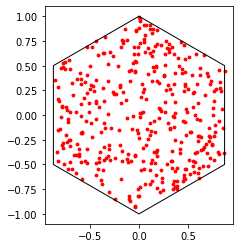

Хорошие точки:


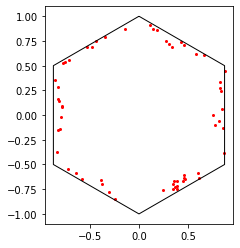

Плохие точки:


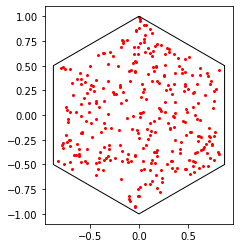

Ответ симуляции: 0.15404699738903394
Ответ теории: 0.1547005383792515


In [6]:
# Правильный 6-угольник с 500 случайно выбранными точками.
task_2(6, 500)

Все точки:


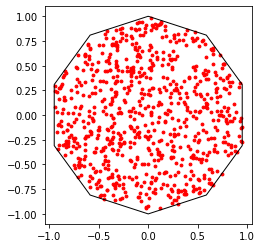

Хорошие точки:


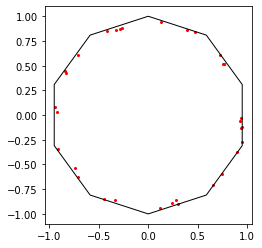

Плохие точки:


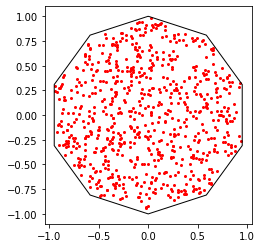

Ответ симуляции: 0.042801556420233464
Ответ теории: 0.0514622242382672


In [7]:
# Правильный 10-угольник с 1000 случайно выбранными точками.
task_2(10, 1000)

Все точки:


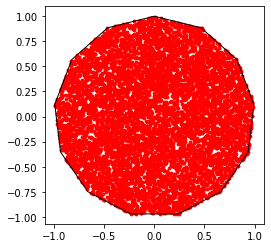

Хорошие точки:


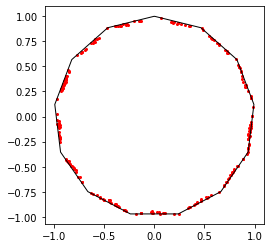

Плохие точки:


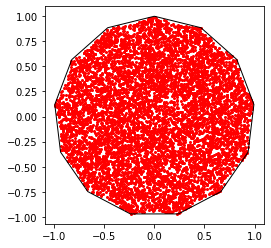

Ответ симуляции: 0.03037777489289887
Ответ теории: 0.0299278309497274


In [8]:
# Правильный 13-угольник с 10000 случайно выбранными точками.
task_2(13, 10000)

## Задача 3

Пусть имеются две независимые серии испытаний Бернулли на $n$ опытов в каждой с вероятностью успеха $p$, $S_i$ – количество успехов в $n$ испытаниях в $i$-ой серии. Найти вероятность $P(S_1 = k | S_1 + S_2 = m)$.

**Решение**: Распишем по определению условной вероятности, воспользуемся формулой вероятности для испытаний Бернулли, и сократим, что получится: $P(S_1 = k|S_1 + S_2 = m) = \frac{P(S_1 = k \& S_1 + S_2 = m)}{P(S_1 + S_2 = m)} = \frac{P(S_1 = k \& S_2 = m - k)}{P(S_1 + S_2 = m)} = \frac{\binom{n}{k} p^{k} (1-p)^{n-k} \cdot \binom{n}{m-k} p^{m-k} (1-p)^{n-m+k}}{\binom{2n}{m} p^m (1-p)^{2n-m}} =  \frac{\binom{n}{k}\binom{n}{m-k}}{\binom{2n}{m}}$. 

Получили довольно занимательный результат, что ответ не зависит от $p$.

С точки зрения симуляции, я провожу number_of_experiments экспериментов, в которых считаю вероятность и усредняю результат. Есть небольшая проблема в том, что если $p$ достаточно маленькое (уже порядка 0.01), то возникает проблема с тем, что событие $S_1 + S_2 = m$ случается очень редко (что логично, т.к. вероятность этого очень мала), поэтому нужно выставлять experiment_length достаточно большим, чтобы получить правильный результат (отличный от 0). 

In [9]:
import random
from math import comb

n = 100
p = 0.1
m = 20
k = 10

answer = 0
number_of_experiments = 10
experiment_length = 40000
for experiment in range(number_of_experiments):
    total = 0
    good = 0
    for epoch in range(0, experiment_length):
        S1 = 0
        for i in range(n):
            S1 += 1 if random.random() < p else 0
        S2 = 0
        for i in range(n):
            S2 += 1 if random.random() < p else 0

        if S1 + S2 == m:
            total += 1
            if S1 == k:
                good += 1
                
    if total != 0:
        answer += good / total

answer /= number_of_experiments

print("Ответ симуляции:", answer)
print("Ответ теории:", comb(n, k) * comb(n, m-k) / comb(2*n, m))

Ответ симуляции: 0.18628696263182035
Ответ теории: 0.18570220703962048


## Задача 4

Рассмотрите схемы Бернулли при $n \in \{10, 100, 1000, 10000\}$ и $p \in \{0.001, 0.01, 0.1, 0.25, 0.5\}$ и рассчитайте точные вероятности (где это возможно)
$P(S_n \in [n/2 - \sqrt{npq}, n/2 + \sqrt{npq}])$, $S_n$ – количество успехов в $n$ испытаниях, и приближенную с помощью одной из предельных теорем. Сравните точные и приближенные вероятности. Объясните результаты.

**Решение:** 
Точная вероятность: $P(S_n \in [n/2 - \sqrt{npq}, n/2 + \sqrt{npq}]) = \sum\limits_{i=0}^{n} \binom{n}{i} p^{i} q^{n-i}$.

Приближенную вероятность посчитаем по интергральной теореме Лапласа, но перед этим проведём преобразования:
$P(S_n \in [n/2 - \sqrt{npq}, n/2 + \sqrt{npq}]) = P(\frac{S_n-np}{\sqrt{npq}} \in [\frac{n(\frac{1}{2} - p)}{\sqrt{npq}} - 1, \frac{n(\frac{1}{2} - p)}{\sqrt{npq}} + 1]) = \Phi(\frac{n(\frac{1}{2} - p)}{\sqrt{npq}} + 1) - \Phi(\frac{n(\frac{1}{2} - p)}{\sqrt{npq}} - 1)$.

Пусть $p = 0.5$. Тогда $P(S_n \in [n/2 - \sqrt{npq}, n/2 + \sqrt{npq}]) = \Phi(1) - \Phi(-1) \approx 0.6826$. Заметим, что ответ не зависит от $n$.

Пусть $p=0.25, n = 10$. Тогда $P(S_n \in [n/2 - \sqrt{npq}, n/2 + \sqrt{npq}]) \approx \Phi(2.83) - \Phi(0.83) = 0.2021$.

Пусть $p=0.25, n = 100$. Тогда $P(S_n \in [n/2 - \sqrt{npq}, n/2 + \sqrt{npq}]) \approx \Phi(6.77) - \Phi(4.77) \approx 10^{-7}$.

Понятно, что если мы и дальше будем увеличивать $n$ и уменьшать $p$, то значения будут становится только меньше (т.к. $\frac{n(\frac{1}{2} - p)}{\sqrt{npq}}$ будет увеличиваться). 

Как мы можем судить из результатов программы ниже, приближенная вероятность довольно близка к точной вероятности и не требует вычислительных ресурсов, поэтому во многих практических случаях может являтся более предпочтительным вариантом решения задачи. 




In [10]:
from math import sqrt, ceil, comb
from decimal import Decimal

ns = [10, 100, 1000, 10000]
ps = [0.001, 0.01, 0.1, 0.25, 0.5]

experiments = 10000

for n in ns:
    for p in ps:
        q = 1 - p
        fr = n/2 - sqrt(n*p*q)
        to = n/2 + sqrt(n*p*q)
        
        # симуляция
        good = 0
        for experiment in range(experiments):
            successes = 0
            for i in range(n):
                successes += 1 if random.random() < p else 0
            
            if fr <= successes and successes <= to:
                good += 1
        
        # подсчёт точного ответа
        accurateAns = 0
        for i in range(ceil(fr), ceil(to)):
            # Использую Decimal, потому что Python при n=10000 и i=1000, не может выполнить даже comb(n, i) * (p**i) 
            accurateAns += Decimal(comb(n, i)) * (Decimal(p) ** i) * (Decimal(q) ** (n-i))
        
        # подсчёт приблизительного ответа, согласно теории
        approxAns = 0.6826 if p == 0.5 else 0.2021 if p == 0.25 and n == 10 else 0
        
        print(f"Для n={n} и p={p} ответ симуляции: {good / experiments}, точный ответ: {accurateAns:0,.4f}, приближенный ответ: {approxAns}")
        

Для n=10 и p=0.001 ответ симуляции: 0.0, точный ответ: 0.0000, приближенный ответ: 0
Для n=10 и p=0.01 ответ симуляции: 0.0, точный ответ: 0.0000, приближенный ответ: 0
Для n=10 и p=0.1 ответ симуляции: 0.0014, точный ответ: 0.0015, приближенный ответ: 0
Для n=10 и p=0.25 ответ симуляции: 0.2236, точный ответ: 0.2206, приближенный ответ: 0.2021
Для n=10 и p=0.5 ответ симуляции: 0.6547, точный ответ: 0.6562, приближенный ответ: 0.6826
Для n=100 и p=0.001 ответ симуляции: 0.0, точный ответ: 0.0000, приближенный ответ: 0
Для n=100 и p=0.01 ответ симуляции: 0.0, точный ответ: 0.0000, приближенный ответ: 0
Для n=100 и p=0.1 ответ симуляции: 0.0, точный ответ: 0.0000, приближенный ответ: 0
Для n=100 и p=0.25 ответ симуляции: 0.0, точный ответ: 0.0000, приближенный ответ: 0
Для n=100 и p=0.5 ответ симуляции: 0.7317, точный ответ: 0.6803, приближенный ответ: 0.6826
Для n=1000 и p=0.001 ответ симуляции: 0.0, точный ответ: 0.0000, приближенный ответ: 0
Для n=1000 и p=0.01 ответ симуляции: 0.0, т